In [1]:
from McSimulator import *
h_PixelEnergyDict = {}
h_ClusterEnergyDict = {}
h_CentralPixelEnergyDict = {}
h2_QcDict = {}
mc_h_PixelEnergyDict = {}
mc_h_ClusterEnergyDict = {}
mc_h_CentralPixelEnergyDict = {}
mc_h2_QcDict = {}
rmsDict = {}; pdfDict = {}; ggdParDict = {}
energyDict = { ### https://xdb.lbl.gov/Section1/Table_1-2.pdf
    'Sn':25.271, 'Sn_beta':28.486,
    'Ag':22.163, 'Ag_beta':24.942,
    'Mo':17.479, 'Mo_beta':19.608,
    'Zr':15.78,  'Zr_beta':17.668,
    'Se':11.222, 'Se_beta':12.496,
    'Ge': 9.886, 'Ge_beta':10.982,
    'Cu': 8.048, 'Cu_beta':8.905,
    'Fe': 6.404, 'Fe_beta':7.079,
    'Ti': 4.51,
}
for key in energyDict:
    energyDict[key] *= 1000 ### eV
attenuationLengthDict = {
    'Fe':36.5417, 'Fe_beta':48.8063,
    'Cu':70.8416, 'Cu_beta':95.1901, 
    'Ge':129.280, 'Ge_beta':257.804,
    'Se':187.700, 'Se_beta':257.804, 
    'Zr':514.376, 'Zr_beta':719.087,
    'Mo':696.533, 'Mo_beta':978.831,
    'Ag':1404.03, 'Ag_beta':1978.21, 
    'Sn':2054.03, 'Sn_beta':2881.53, 
}
kBetaKAlphaRatioDict = {'Fe':0.134, 'Cu':0.134, 'Ge':0.145, 'Se':0.149, 'Ag':0.145} ### https://www.researchgate.net/profile/Abdelhalim-Kahoul/publication/260424850_Empirical_Semi-Empirical_and_Experimental_Determination_of_K_X-Ray_Fluorescence_Parameters_of_Some_Elements_in_the_Atomic_Range_21_Z_30/links/54a52c110cf267bdb906feaf/Empirical-Semi-Empirical-and-Experimental-Determination-of-K-X-Ray-Fluorescence-Parameters-of-Some-Elements-in-the-Atomic-Range-21-Z-30.pdf
selectionRange = .5 # keV
clusterBinningWidth = 0.05 #keV

Welcome to JupyROOT 6.28/04


In [13]:
### load results from root file
from ROOT import *
inFile = TFile.Open('Measurements.root','read')
inFile.ls()
for element in ['Cu', 'Ag']:
    try:
        h_PixelEnergyDict[element] = inFile.Get('h_PixelEnergy_'+element)
        h_ClusterEnergyDict[element] = inFile.Get('h_ClusterEnergy_'+element)
        h_CentralPixelEnergyDict[element] = inFile.Get('h_CentralPixelEnergy_'+element)
        h2_QcDict[element] = inFile.Get('h2_Qc_'+element)

    except:
        continue
    h_PixelEnergyDict[element].SetDirectory(0)
    h_ClusterEnergyDict[element].SetDirectory(0)
    h_CentralPixelEnergyDict[element].SetDirectory(0)
    h2_QcDict[element].SetDirectory(0)

inFile.Close()

TFile**		Measurements.root	
 TFile*		Measurements.root	
  KEY: TH1D	h_ClusterEnergy_Cu;1	ClusterEnergy
  KEY: TH1D	h_PixelEnergy_Cu;1	PixelEnergy
  KEY: TH1D	h_CentralPixelEnergy_Cu;1	CentralPixelEnergy
  KEY: TH2D	h2_Qc_Cu;1	h2_Qc
  KEY: TH1D	h_ClusterEnergy_Ag;1	ClusterEnergy
  KEY: TH1D	h_PixelEnergy_Ag;1	PixelEnergy
  KEY: TH1D	h_CentralPixelEnergy_Ag;1	CentralPixelEnergy
  KEY: TH2D	h2_Qc_Ag;1	h2_Qc


In [4]:
### generate results of rmslist and pdflist

from McSimulator import McSimulator
element = 'Cu' ### 'Cu_beta', 'Ag', 'Ag_beta'

repulsionInvolved = True

simuConfig = {
    'sensorThickness':320,
    'T': 293,
    'depletionVoltage': 30,
    'appliedVoltage': 90,
    'attenuationLength': attenuationLengthDict[element],
    'eIncident': energyDict[element],
    'repulsionInvolved': repulsionInvolved,
}
moench = McSimulator(simuConfig)
print(element)
moench.n = 100000
moench.tInterval = 0.01
moench.zBinning = 64
rmsList, pdfList, ggdParList = moench.simulate()
rmsDict[(element, repulsionInvolved)] = rmsList
pdfDict[(element, repulsionInvolved)] = pdfList
ggdParDict[(element, repulsionInvolved)] = ggdParList ### (beta, alpha)

Cu
No1: beta = 2.00, alpha = 11.96, rms = 8.47, time = 26.06
Chi2/NDF = 1.24
No2: beta = 2.13, alpha = 12.25, rms = 8.40, time = 25.49
Chi2/NDF = 0.98
No3: beta = 2.13, alpha = 12.06, rms = 8.28, time = 24.93
Chi2/NDF = 1.14
No4: beta = 2.16, alpha = 12.04, rms = 8.22, time = 24.38
Chi2/NDF = 1.09
No5: beta = 2.13, alpha = 11.83, rms = 8.12, time = 23.83
Chi2/NDF = 1.09
No6: beta = 2.14, alpha = 11.69, rms = 8.01, time = 23.30
Chi2/NDF = 1.03
No7: beta = 2.13, alpha = 11.56, rms = 7.94, time = 22.76
Chi2/NDF = 0.98
No8: beta = 2.13, alpha = 11.43, rms = 7.84, time = 22.24
Chi2/NDF = 1.07
No9: beta = 2.15, alpha = 11.37, rms = 7.78, time = 21.72
Chi2/NDF = 1.11
No10: beta = 2.17, alpha = 11.22, rms = 7.65, time = 21.21
Chi2/NDF = 1.01
No11: beta = 2.17, alpha = 11.13, rms = 7.59, time = 20.71
Chi2/NDF = 1.04
No12: beta = 2.15, alpha = 10.95, rms = 7.50, time = 20.21
Chi2/NDF = 1.16
No13: beta = 2.15, alpha = 10.84, rms = 7.42, time = 19.72
Chi2/NDF = 1.00
No14: beta = 2.14, alpha = 10.6

Info in <TCanvas::Print>: pdf file ./No1.pdf has been created
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: pdf file ./No2.pdf has been created
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: pdf file ./No3.pdf has been created
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: pdf file ./No4.pdf has been created
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: pdf file ./No5.pdf has been created
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: pdf file ./No6

total entries = 1133936.0


Warning in <TROOT::Append>: Replacing existing TH1: h2_subPixel (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: pixelEnergy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: pixelEnergy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: centerPixelEnergy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: clusterEnergy (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


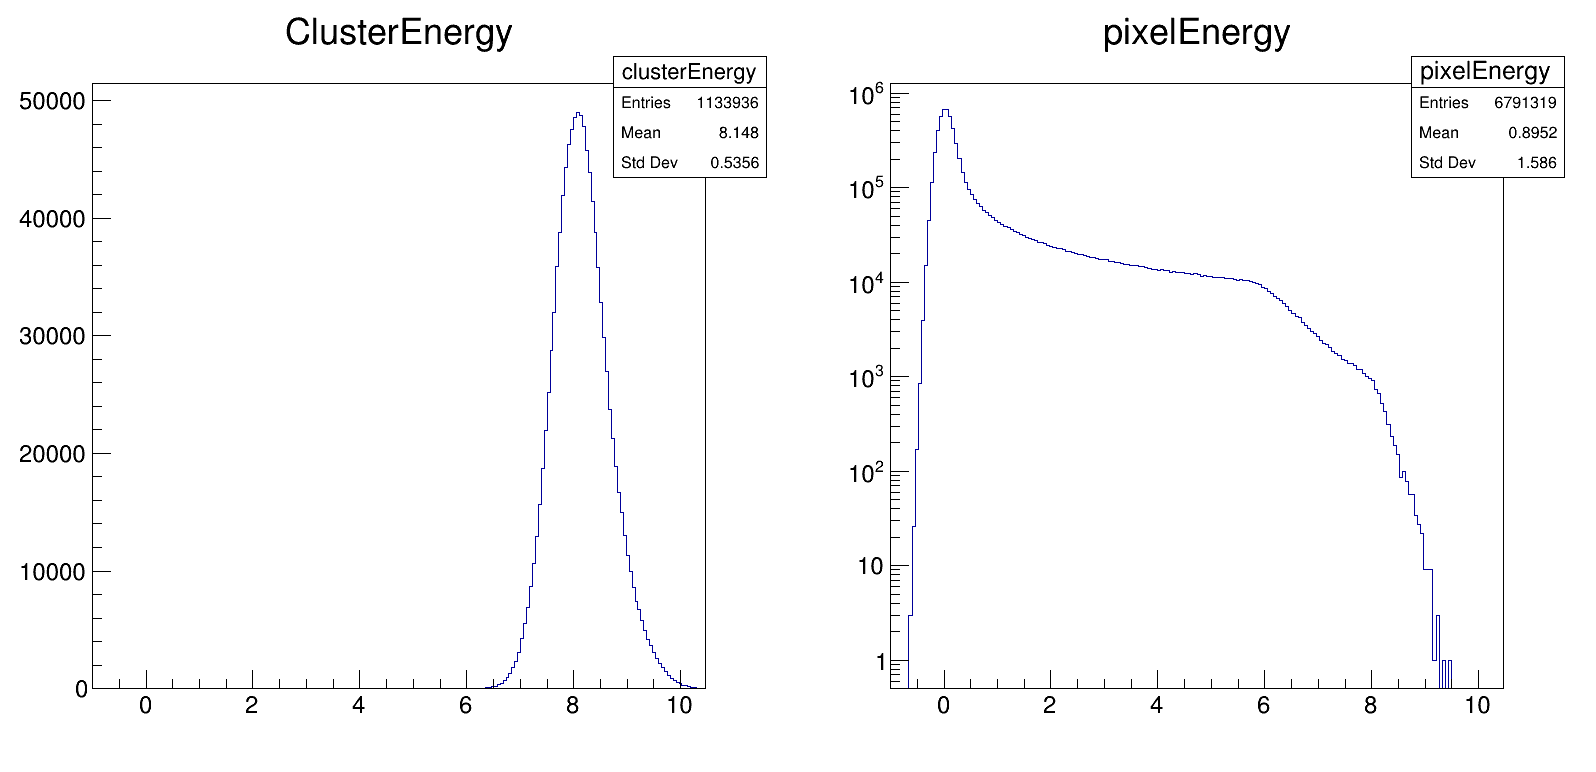

In [15]:
### translate rmsList and pdfList into 2D and 1d hists
config = ('Cu', True) ### element, repulsionInvolved
from ROOT import *
from array import array
from scipy.stats import gennorm
noiseFrame = np.ones((400, 400)) * 0.13 ### in keV; or sampled from measurements
linearNoiseCoeff = 7.14  ### the noise linear to the energy
noiseThresholdFactor = 0  ### threshold for noise cut; 0 means no threshold
kBetaInvolved = True
element = config[0]
def getSubPixelPlot(index):
    element, repulsionInvolved = config
    rmsList, pdfList, energy = rmsDict[config], pdfDict[config], energyDict[element]
    ggdParList = ggdParDict[config]
    nElectron = 1e6
    i = index
    h2_subPixel = TH2D(f'h2_subPixel_{index}', f"h2_subPixel_{index}", 101, 0, 1, 101, 0, 1)
    h1_pixelEnergy = TH1D(f'pixelEnergy_{index}', f"pixelEnergy_{index}", 200, -1, energy*1.3/1000)
    h1_centerPixelEnergy = TH1D(f'centerPixelEnergy_{index}', f"centerPixelEnergy_{index}", 200, -1, energy*1.3/1000)
    h1_clusterEnergy = TH1D(f'clusterEnergy_{index}', f"ClusterEnergy_{index}", int(energy*1.3/1000//clusterBinningWidth), -1, energy*1.3/1000)
    for __ in range(int(nElectron * pdfList[i])):
        noiseX, noiseY = np.random.randint(20, 380), np.random.randint(20, 380)
        noise = noiseFrame[noiseY-2:noiseY+3, noiseX-2:noiseX+3]*1000 * 1.
        nGroup = int(energy/3.6)
        x_center = np.random.uniform(50, 75) # um
        y_center = np.random.uniform(50, 75) # um
        if ggdParList[i][0] < 0 or ggdParList[i][1] < 0:
            print(f'warning: {element} {repulsionInvolved} ggdParList [{i}] = {ggdParList[i]}')
            continue
        xs = gennorm.rvs(beta=ggdParList[i][0], loc=x_center, scale=ggdParList[i][1], size=nGroup)
        ys = gennorm.rvs(beta=ggdParList[i][0], loc=y_center, scale=ggdParList[i][1], size=nGroup)
        ## regularization into pixels
        xs=xs//25 ### um -> pixel
        ys=ys//25
        xs = np.clip(xs, 0, 4)
        ys = np.clip(ys, 0, 4)
        
        pixelArray = np.zeros((5, 5))
        np.add.at(pixelArray, (xs.astype(int), ys.astype(int)), 1)
        pixelArray = pixelArray/nGroup * energy
        pixelArray += np.random.normal(0, np.sqrt(noise ** 2 + (linearNoiseCoeff*pixelArray) ), (5, 5))
        if noiseThresholdFactor > 0:
            pixelArray[pixelArray < noise * noiseThresholdFactor] = 0
        ### truncate to 3x3 centering at the pixel with the highest energy
        highestPixel = (np.argmax(pixelArray)//5, np.argmax(pixelArray)%5)
        pixelArray = pixelArray[highestPixel[0]-1:highestPixel[0]+2, highestPixel[1]-1:highestPixel[1]+2]
        
        clusterEnergy = np.sum(pixelArray)
        if clusterEnergy/1000 < 1:
            print(pixelArray)
        h1_clusterEnergy.Fill(clusterEnergy/1000)
        if energyDict[element] - selectionRange * 1000 < clusterEnergy < energyDict[element] + selectionRange * 1000:
            h1_pixelEnergy.FillN(9, array('d', pixelArray.flatten()/1000), array('d', np.ones(9)))
            h1_centerPixelEnergy.Fill(pixelArray[1, 1]/1000)
            x_qc = (np.average(np.arange(3), weights=pixelArray.sum(axis=1)) + 0.5)%1
            y_qc = (np.average(np.arange(3), weights=pixelArray.sum(axis=0)) + 0.5)%1
            h2_subPixel.Fill(x_qc, y_qc)

    if kBetaInvolved:
        kBetaRatio = kBetaKAlphaRatioDict[element]
        beta_pdfList = pdfDict[(f'{element}_beta', repulsionInvolved)]
        beta_ggdParList = ggdParDict[(f'{element}_beta', repulsionInvolved)]
        energy = energyDict[f'{element}_beta']
    
        for __ in range(int(nElectron * beta_pdfList[i] * kBetaRatio)):
            noiseX, noiseY = np.random.randint(20, 380), np.random.randint(20, 380)
            noise = noiseFrame[noiseY-2:noiseY+3, noiseX-2:noiseX+3]*1000 * 1.
            nGroup = int(energy/3.6)
            x_center = np.random.uniform(50, 75)
            y_center = np.random.uniform(50, 75)
            xs = gennorm.rvs(beta=beta_ggdParList[i][0], loc=x_center, scale=beta_ggdParList[i][1], size=nGroup)
            ys = gennorm.rvs(beta=beta_ggdParList[i][0], loc=y_center, scale=beta_ggdParList[i][1], size=nGroup)
            xs=xs//25
            ys=ys//25
            xs = np.clip(xs, 0, 4)
            ys = np.clip(ys, 0, 4)
            pixelArray = np.zeros((5, 5))
            np.add.at(pixelArray, (xs.astype(int), ys.astype(int)), 1)
            pixelArray = pixelArray/nGroup * energy
            pixelArray += np.random.normal(0, np.sqrt(noise ** 2 + (linearNoiseCoeff*pixelArray) ), (5, 5))
            ### truncate to 3x3 centering at the pixel with the highest energy
            highestPixel = (np.argmax(pixelArray)//5, np.argmax(pixelArray)%5)
            pixelArray = pixelArray[highestPixel[0]-1:highestPixel[0]+2, highestPixel[1]-1:highestPixel[1]+2]
            
            if noiseThresholdFactor > 0:
                pixelArray[pixelArray < noise * noiseThresholdFactor] = 0
            clusterEnergy = np.sum(pixelArray)
            h1_clusterEnergy.Fill(clusterEnergy/1000)
            if energyDict[element] - selectionRange * 1000 < clusterEnergy < energyDict[element] + selectionRange * 1000:
                h1_pixelEnergy.FillN(9, array('d', pixelArray.flatten()/1000), array('d', np.ones(9)))
                h1_centerPixelEnergy.Fill(pixelArray[1, 1]/1000)
                x_qc = (np.average(np.arange(3), weights=pixelArray.sum(axis=1)) + 0.5)%1
                y_qc = (np.average(np.arange(3), weights=pixelArray.sum(axis=0)) + 0.5)%1
                h2_subPixel.Fill(x_qc, y_qc)


    return h2_subPixel.Clone(), h1_pixelEnergy.Clone(), h1_clusterEnergy.Clone(), h1_centerPixelEnergy.Clone()

from multiprocessing import Pool
with Pool(16) as p:
    results = p.map(getSubPixelPlot, range(len(pdfList)))

energy = energyDict[element]
h2_subPixel = TH2D("h2_subPixel", "h2_subPixel", 101, 0, 1, 101, 0, 1)
h1_pixelEnergy = TH1D("pixelEnergy", "pixelEnergy", 200, -1, energy*1.3/1000)
h1_centerPixelEnergy = TH1D("centerPixelEnergy", "centerPixelEnergy", 200, -1, energy*1.3/1000)
h1_clusterEnergy = TH1D('clusterEnergy', "ClusterEnergy", int(energy*1.3/1000//clusterBinningWidth), -1, energy*1.3/1000)
for h2_subPixel_, h1_pixelEnergy_, h1_clusterEnergy_, h1_centerPixelEnergy_ in results:
    h2_subPixel.Add(h2_subPixel_)
    h1_pixelEnergy.Add(h1_pixelEnergy_)
    h1_clusterEnergy.Add(h1_clusterEnergy_)
    h1_centerPixelEnergy.Add(h1_centerPixelEnergy_)

mc_h_PixelEnergyDict[config] = h1_pixelEnergy.Clone()
mc_h_CentralPixelEnergyDict[config] = h1_centerPixelEnergy.Clone()
mc_h_ClusterEnergyDict[config] = h1_clusterEnergy.Clone()
mc_h2_QcDict[config] = h2_subPixel.Clone()
print(f'total entries = {h1_clusterEnergy.GetEntries()}')

c = TCanvas("c", "c", 1600, 800)
c.Divide(2, 1)
pad1 = c.cd(1)
mc_h_ClusterEnergyDict[config].Draw()

pad2 = c.cd(2)
mc_h_PixelEnergyDict[config].Draw()
pad2.SetLogy(1)
c.Draw()

1133936.0
Simu Cluster Energy:8.077 +- 0.483
Meas Cluster Energy:8.092 +- 0.512
Simu average Cluster Energy: 8.096
Meas average Cluster Energy: 8.004
Simu Pixel Noise: 0.133 [keV], center: 0.026 [keV]
Meas Pixel Noise: 0.142 [keV], center: 0.027 [keV]
Simu average Pixel Energy: 0.895
Meas average Pixel Energy: 0.897
Simu bins = 200
Meas bins = 200
Chi2/NDF = 10.315149000958847
Meas average X: 0.4964, rms: 0.2601
Meas average Y: 0.5000, rms: 0.2584
Simu average X: 0.5003, rms: 0.2595
Simu average Y: 0.4996, rms: 0.2593


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 18 points have been skipped


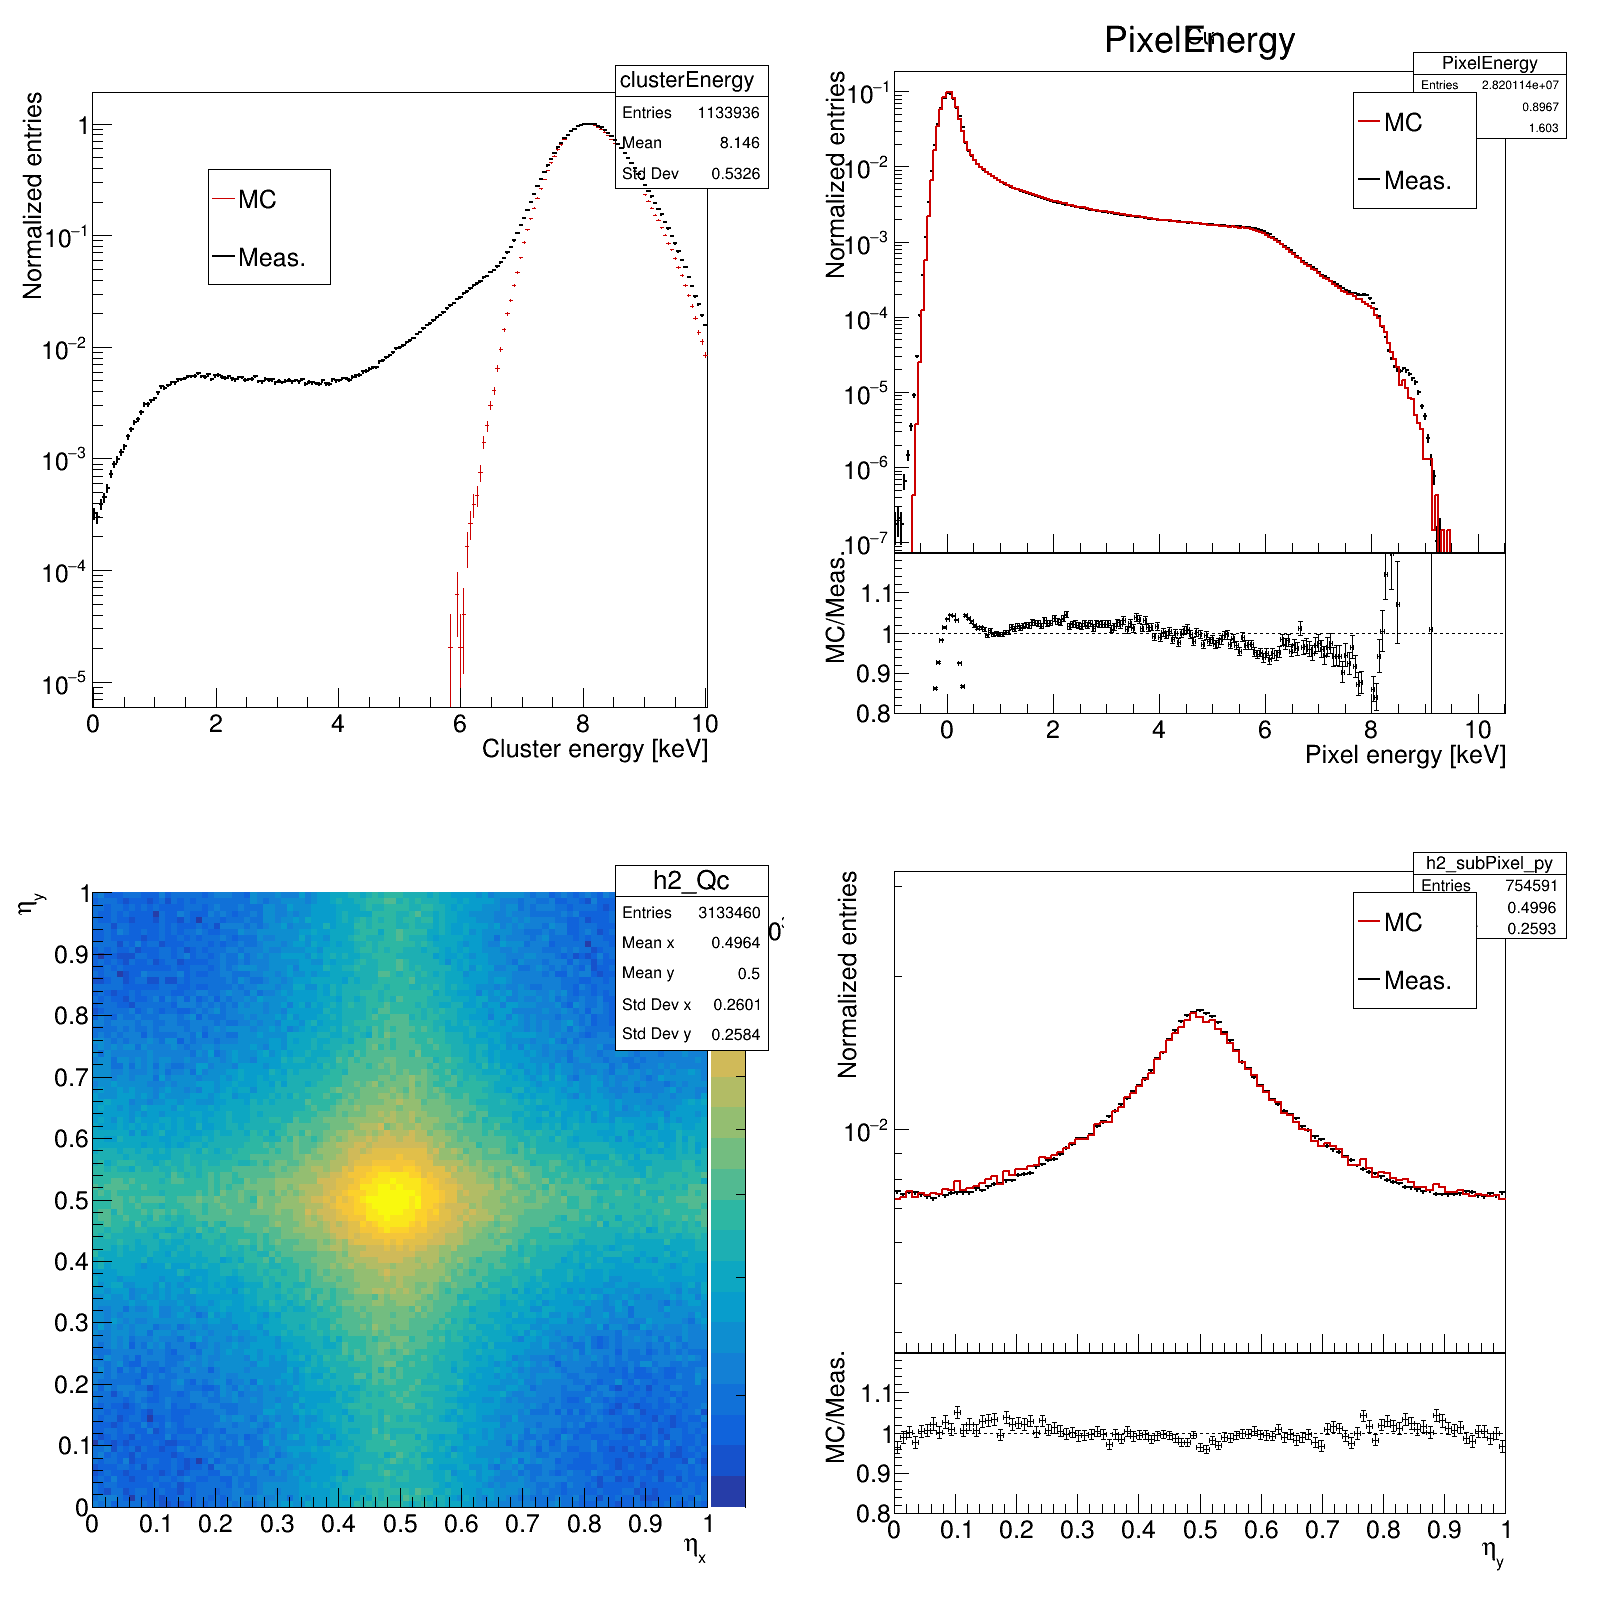

In [19]:
### plotting ###
config = ('Cu', True) 
element, repulsionInvolved = config
# gStyle.SetMarkerSize(.5)
# gROOT.SetStyle("style")
# gROOT.ForceStyle()

_c = TCanvas()
_c.SetLogy()
_c.SetCanvasSize(800, 800)
c = TCanvas("c", "c")
c.SetCanvasSize(1600, 1600)
c.Divide(2, 2)
pad1 = c.cd(1)

print(mc_h_ClusterEnergyDict[config].GetEntries())
mc_h_ClusterEnergyDict[config].SetLineColor(kRed+1)
mc_h_ClusterEnergyDict[config].SetMarkerColor(kRed+1)
mc_h_ClusterEnergyDict[config].Scale(1/mc_h_ClusterEnergyDict[config].GetMaximum())
mc_h_ClusterEnergyDict[config].Fit("gaus", 'Q', '', energyDict[element]/1000-selectionRange, energyDict[element]/1000+selectionRange)
mc_h_ClusterEnergyDict[config].GetFunction("gaus").SetLineWidth(0)
mc_h_ClusterEnergyDict[config].GetXaxis().SetRangeUser(energyDict[element]/1000-1, energyDict[element]/1000+1)

h_ClusterEnergyDict[element].Scale(1/h_ClusterEnergyDict[element].GetMaximum())
h_ClusterEnergyDict[element].SetLineColor(kBlack)
h_ClusterEnergyDict[element].Fit("gaus", 'Q', '', energyDict[element]/1000-selectionRange, energyDict[element]/1000+selectionRange)
h_ClusterEnergyDict[element].SetLineWidth(2)
h_ClusterEnergyDict[element].GetFunction("gaus").SetLineWidth(0)
print(f'Simu Cluster Energy:{mc_h_ClusterEnergyDict[config].GetFunction("gaus").GetParameter(1):.3f} +- {mc_h_ClusterEnergyDict[config].GetFunction("gaus").GetParameter(2):.3f}')
print(f'Meas Cluster Energy:{h_ClusterEnergyDict[element].GetFunction("gaus").GetParameter(1):.3f} +- {h_ClusterEnergyDict[element].GetFunction("gaus").GetParameter(2):.3f}')
print(f'Simu average Cluster Energy: {mc_h_ClusterEnergyDict[config].GetMean():.3f}')
print(f'Meas average Cluster Energy: {h_ClusterEnergyDict[element].GetMean():.3f}')
pad1.SetLogy(1)
mc_h_ClusterEnergyDict[config].SetTitle(f';Cluster energy [keV];Normalized entries')
___l = TLegend(0.25, 0.65, 0.41, 0.8)
mc_h_ClusterEnergyDict[config].GetXaxis().SetRangeUser(0, 10)
mc_h_ClusterEnergyDict[config].Draw()
h_ClusterEnergyDict[element].Draw('same')
___l.AddEntry(mc_h_ClusterEnergyDict[config], "MC", 'l')
___l.AddEntry(h_ClusterEnergyDict[element], "Meas.", 'lp')
___l.Draw('SAME')
pad2 = c.cd(2)
pad2.SetLogy(1)

mc_h_PixelEnergyDict[config].Scale(1/mc_h_PixelEnergyDict[config].Integral())
mc_h_PixelEnergyDict[config].SetLineWidth(2)
mc_h_PixelEnergyDict[config].Fit("gaus", 'Q', '', -0.5, 0.1)
mc_h_PixelEnergyDict[config].GetFunction("gaus").SetLineWidth(0)
mc_h_PixelEnergyDict[config].SetTitle(f"{element};Pixel energy [keV];Normalized entries")
mc_h_PixelEnergyDict[config].SetLineColor(kRed+1)
h_PixelEnergyDict[element].SetLineColor(kBlack)
h_PixelEnergyDict[element].SetLineWidth(2)
h_PixelEnergyDict[element].Scale(1/h_PixelEnergyDict[element].Integral())
h_PixelEnergyDict[element].Fit("gaus", 'Q', '', -0.5, 0.1)
h_PixelEnergyDict[element].GetFunction("gaus").SetLineColor(kBlack)
h_PixelEnergyDict[element].GetFunction("gaus").SetLineWidth(0)

print(f'Simu Pixel Noise: {mc_h_PixelEnergyDict[config].GetFunction("gaus").GetParameter(2):.3f} [keV], center: {mc_h_PixelEnergyDict[config].GetFunction("gaus").GetParameter(1):.3f} [keV]')
print(f'Meas Pixel Noise: {h_PixelEnergyDict[element].GetFunction("gaus").GetParameter(2):.3f} [keV], center: {h_PixelEnergyDict[element].GetFunction("gaus").GetParameter(1):.3f} [keV]')
print(f'Simu average Pixel Energy: {mc_h_PixelEnergyDict[config].GetMean():.3f}')
print(f'Meas average Pixel Energy: {h_PixelEnergyDict[element].GetMean():.3f}')
print(f'Simu bins = {mc_h_PixelEnergyDict[config].GetNbinsX()}')
print(f'Meas bins = {h_PixelEnergyDict[element].GetNbinsX()}')
rp_PixelEnergy = TRatioPlot(mc_h_PixelEnergyDict[config], h_PixelEnergyDict[element])
rp_PixelEnergy.Draw()
rp_PixelEnergy.GetLowerRefYaxis().SetTitle("MC/Meas.")
rp_PixelEnergy.GetLowerRefYaxis().SetRangeUser(0.8, 1.2)
rp_PixelEnergy.SetUpBottomMargin(0.)
rp_PixelEnergy.SetLowTopMargin(0.)
chiSquared = 0
ndf = 0
for i in range(1, h_PixelEnergyDict[element].GetNbinsX()+1):
    if h_PixelEnergyDict[element].GetBinCenter(i) < 2:
        continue ### ignore the low energy part
    if mc_h_PixelEnergyDict[config].GetBinContent(i) > 0:
        chiSquared += (mc_h_PixelEnergyDict[config].GetBinContent(i) - h_PixelEnergyDict[element].GetBinContent(i))**2 / (mc_h_PixelEnergyDict[config].GetBinError(i)**2 + h_PixelEnergyDict[element].GetBinError(i)**2)
        ndf += 1
print(f'Chi2/NDF = {chiSquared/ndf}')
l = TLegend(0.7, 0.75, 0.86, 0.90)
l.AddEntry(mc_h_PixelEnergyDict[config], "MC", 'l')
l.AddEntry(h_PixelEnergyDict[element], "Meas.", 'lp')
l.Draw('SAME')
rp_PixelEnergy.GetLowYaxis().SetNdivisions(505)
rp_PixelEnergy.GetUpperPad().cd()
mc_h_PixelEnergyDict[config].Draw('same hist')
# _c.Draw()

pad4 = c.cd(3)
pad4.SetLogz(1)
h2_QcDict[element].SetTitle(";#eta_{x};#eta_{y}")
mc_h2_QcDict[config].SetTitle(";#eta_{x};#eta_{y}")
h2_QcDict[element].Draw('colz')
print(f'Meas average X: {h2_QcDict[element].GetMean(1):.4f}, rms: {h2_QcDict[element].GetRMS(1):.4f}')
print(f'Meas average Y: {h2_QcDict[element].GetMean(2):.4f}, rms: {h2_QcDict[element].GetRMS(2):.4f}')

pad3 = c.cd(4)
pad3.SetLogy(1)
mc_EtaY = mc_h2_QcDict[config].ProjectionY()
mc_EtaY.Scale(1/mc_EtaY.Integral())
mc_EtaY.SetLineColor(kRed+1)
mc_EtaY.SetLineWidth(2)
mc_EtaY.SetTitle(';#eta_{y};Normalized entries')
etaY = h2_QcDict[element].ProjectionY()
etaY.Scale(1/etaY.Integral())
etaY.SetLineColor(kBlack)
etaY.SetLineWidth(2)
rp_Eta = TRatioPlot(mc_EtaY, etaY)
rp_Eta.Draw()
rp_Eta.GetUpperRefYaxis().SetTitle('Normalized entries')
rp_Eta.GetLowerRefYaxis().SetTitle('MC/Meas.')
rp_Eta.SetUpBottomMargin(0.)
rp_Eta.SetLowTopMargin(0.)
rp_Eta.GetLowerRefYaxis().SetRangeUser(0.8, 1.2)
rp_Eta.GetLowYaxis().SetNdivisions(505)
l_eta = TLegend(0.7, 0.75, 0.86, 0.9)
l_eta.AddEntry(mc_EtaY, 'MC', 'l')
l_eta.AddEntry(etaY, 'Meas.', 'lp')
l_eta.Draw('SAME')
rp_Eta.GetUpperPad().cd()
mc_EtaY.SetLineWidth(2)
mc_EtaY.Draw('same hist')
gStyle.SetTitleYOffset(1.4)
gROOT.ForceStyle()

print(f'Simu average X: {mc_h2_QcDict[config].GetMean(1):.4f}, rms: {mc_h2_QcDict[config].GetRMS(1):.4f}')
print(f'Simu average Y: {mc_h2_QcDict[config].GetMean(2):.4f}, rms: {mc_h2_QcDict[config].GetRMS(2):.4f}')

c.Draw()